In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
city_data = pd.read_csv("Pyber/raw_data/city_data.csv")
ride_data = pd.read_csv("Pyber/raw_data/ride_data.csv")

In [3]:
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
final_data = pd.merge(ride_data,city_data, how = 'left', on = 'city')
final_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


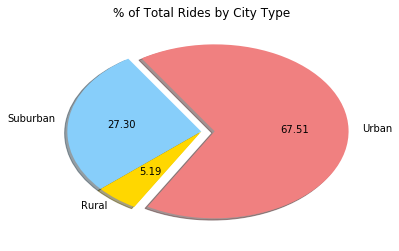

In [32]:
#total = final_data['type'].count()
type_plot = plt.pie(final_data['type'].value_counts(), explode = [0.10,0, 0], labels = final_data['type'].unique(),
                    autopct='%.2f',colors = ['LightCoral', 'LightSkyBlue', 'Gold'],shadow = True, startangle = 240)
plt.title('% of Total Rides by City Type')
plt.savefig('rides_city_type.png')
plt.show()
#total

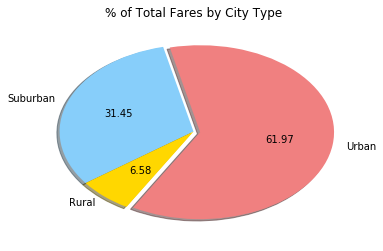

In [24]:
fare_sum = final_data['fare'].sum()
sum_list = []
temp = final_data.loc[final_data['type'] == 'Urban']
urban_sum = temp['fare'].sum()
sum_list.append(urban_sum)
temp = final_data.loc[final_data['type'] == 'Suburban']
sub_sum = temp['fare'].sum()
sum_list.append(sub_sum)
temp = final_data.loc[final_data['type'] == 'Rural']
rural_sum = temp['fare'].sum()
sum_list.append(rural_sum)
i = 0
for item in sum_list:
    sum_list[i] = (sum_list[i]/fare_sum)*100
    i = i+1
fare_type_plot = plt.pie(sum_list, explode = [0.05, 0 , 0], labels = final_data['type'].unique(),autopct = '%.2f'
                        , colors = ['LightCoral', 'LightSkyBlue', 'Gold'],shadow = True, startangle = 240)
plt.title('% of Total Fares by City Type')
plt.savefig('fares_city_type.png')
plt.show()

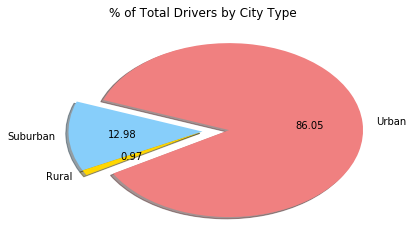

In [31]:
driver_sum = final_data['driver_count'].sum()
sum_list = []
temp = final_data.loc[final_data['type'] == 'Urban']
urban_sum = temp['driver_count'].sum()
sum_list.append(urban_sum)
temp = final_data.loc[final_data['type'] == 'Suburban']
sub_sum = temp['driver_count'].sum()
sum_list.append(sub_sum)
temp = final_data.loc[final_data['type'] == 'Rural']
rural_sum = temp['driver_count'].sum()
sum_list.append(rural_sum)
i = 0
for item in sum_list:
    sum_list[i] = (sum_list[i]/fare_sum)*100
    i = i+1
fare_type_plot = plt.pie(sum_list, explode = [0.20, 0 , 0], labels = final_data['type'].unique(),autopct = '%.2f'
                         ,colors = ['LightCoral', 'LightSkyBlue', 'Gold'],shadow = True, startangle = 210)
plt.title('% of Total Drivers by City Type')
plt.savefig('drivers_city_type.png')
plt.show()